<a href="https://colab.research.google.com/github/rainardw/TUGAS-BESAR-BIG-DATA-CCTV-KOTA-MATARAM/blob/main/TUGAS_BESAR_CCTV_KOTA_MATARAM_WITH_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import string
from datetime import datetime, timedelta
import pandas as pd

In [2]:
def random_visual_string(min_len=50, max_len=200):
    length = random.randint(min_len, max_len)
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

In [3]:
locations = [
    "Karang Pule", "Gajah Mada", "Cakranegara", "Ampenan", "Majapahit", "Islamic Center NTB",
    "UNRAM Gate", "Kantor Walikota Mataram", "Sandubaya", "Panji Tilar", "Jalan Pemuda", "Swakarya", "Sriwijaya",
    "Lombok Epicentrum Mall", "Pagesangan", "Pejanggik",
    "Rembiga", "Sayang-Sayang", "Pagutan"
]

weather = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat", "Hujan Petir", "Kabut"]
directions = ["Utara → Selatan", "Selatan → Utara", "Timur → Barat", "Barat → Timur"]
vehicle_types = ["Motor", "Mobil", "Truk", "Bus"]

In [4]:
plate_prefixes = (
    ["DR"] * 50 +
    ["EA"] * 30 +
    ["B"] * 5 +
    ["AB"] * 5 +
    ["AD"] * 5 +
    ["N"] * 5
)

def generate_plate():
    prefix = random.choice(plate_prefixes)
    middle = str(random.randint(1000, 9999))
    suffix = "".join(random.choices(string.ascii_uppercase, k=2))
    return prefix + middle + suffix

def random_visual_string(size=120):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size))

# Buat dataset
data = []
start_time = datetime(2025, 9, 18, 6, 0, 0)

for i in range(1000):
    timestamp = start_time + timedelta(seconds=i * random.randint(5, 15))

    vehicle_count = random.randint(50, 300)
    speed = random.uniform(15, 80)
    density = random.randint(100, 500)
    congestion_duration = random.randint(0, 60)
    visibility = random.randint(20, 150)
    motion_density = random.uniform(0.1, 1.0)
    brightness = random.randint(30, 100)

    vehicle_type = random.choice(vehicle_types)
    plate = generate_plate()

    data.append([
        i + 1, timestamp, random.choice(locations), vehicle_count, speed,
        density, congestion_duration, visibility, motion_density, brightness,
        random.choice(weather), random.choice(directions),
        vehicle_type, plate, random_visual_string()
    ])

df = pd.DataFrame(data, columns=[
    "id", "timestamp", "location", "vehicle_count", "speed",
    "density", "congestion_duration", "visibility", "motion_density",
    "brightness", "weather", "direction", "vehicle_type",
    "plate_number", "visual_data"
])

pd.set_option("display.max_rows", 1000)
df

,id,timestamp,location,vehicle_count,speed,density,congestion_duration,visibility,motion_density,brightness,weather,direction,vehicle_type,plate_number,visual_data
0,1,2025-09-18 06:00:00,Ampenan,211,22.714614,408,14,52,0.672647,85,Cerah,Selatan → Utara,Truk,AB6071GR,uWWLyKbVxfN73NDl5zSrSTKCbPMq980pWsUOrNggD7wuLY...
1,2,2025-09-18 06:00:05,Sriwijaya,83,63.778481,434,5,97,0.566084,45,Kabut,Utara → Selatan,Truk,DR1442DD,8c39BMohW67qUG1WyVxO2mBvft99aUH2nAB0Z216VqcomC...
2,3,2025-09-18 06:00:22,Ampenan,217,67.905079,187,48,140,0.455629,59,Kabut,Barat → Timur,Bus,AB6561WC,fzSpFZdThx6f5o5vAKA8NJmBB26rtX1R4P2dW6xjY7yu03...
3,4,2025-09-18 06:00:27,Sandubaya,263,32.203126,375,23,92,0.730220,94,Berawan,Utara → Selatan,Mobil,EA2965NI,oPlamrK8Ob4aEuhodwC8e9EqHgSE0xl35YmhDpS1LFNicw...
4,5,2025-09-18 06:00:36,Jalan Pemuda,212,39.061782,199,19,75,0.573599,30,Hujan Ringan,Barat → Timur,Mobil,AD7352PZ,e5q9RyV1dDYQuINu7zq9n0Zpy71CIgZkeypmBDJAyWr3Kc...
5,6,2025-09-18 06:01:05,Pagutan,178,55.864802,257,38,21,0.478135,31,Hujan Ringan,Barat → Timur,Bus,DR8897KW,jOE9RT4HHR8cciDLmoXPNDaGfsnvyiAwIOaWsPjnFLLT7H...
6,7,2025-09-18 06:01:00,Pagesangan,88,18.548865,262,59,107,0.790872,42,Hujan Ringan,Selatan → Utara,Bus,DR3756SZ,qOoPzk8kNtgmz77QTW0XLW4ricIquURPChkvdmw921K7CR...
7,8,2025-09-18 06:01:24,Majapahit,52,29.394736,452,51,27,0.414144,89,Cerah,Timur → Barat,Truk,DR8197SO,LW4V0nEj1J8JrsSOWHR3llhMdqBdAdHHNvUJJLq32WpWkn...
8,9,2025-09-18 06:01:44,Cakranegara,133,76.702685,382,38,83,0.593449,31,Cerah,Utara → Selatan,Mobil,DR8282IT,AwbUDls4cRCW2rIgjp0EFDwGdvU8uDmPXvrgpJc8zTzmf8...
9,10,2025-09-18 06:01:30,Pejanggik,223,15.216247,386,3,106,0.993644,63,Berawan,Barat → Timur,Bus,B1966RI,lYU7OuVekkfBwSg0zcQLUZuTrjuDvNFwOqcO6qbw4tmoAS...


In [5]:
url = "https://raw.githubusercontent.com/rainardw/TUGAS-BESAR-BIG-DATA-CCTV-KOTA-MATARAM/main/dataset_cctv_mataram_1000.csv"
df = pd.read_csv(url)

In [6]:
df.describe()

,jumlah_kendaraan,kecepatan_km_jam,kepadatan_kendaraan_per_km,durasi_kemacetan_menit,visibilitas_meter,frame_width,frame_height,vehicle_count_per_frame,brightness_level,motion_density
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1024.733000,28.539450,293.878820,19.736000,70.015000,1288.320000,724.680000,12.929000,0.601210,0.511370
std,443.835419,12.117931,149.150229,9.651085,17.974589,515.778252,290.125267,7.058313,0.229926,0.230446
min,300.000000,8.010000,69.600000,0.000000,40.000000,640.000000,360.000000,1.000000,0.200000,0.100000
25%,684.750000,18.032500,181.550000,13.000000,54.000000,640.000000,360.000000,7.000000,0.400000,0.310000
50%,979.500000,28.235000,266.970000,20.000000,71.000000,1280.000000,720.000000,13.000000,0.590000,0.520000
75%,1300.000000,38.915000,370.070000,26.000000,85.250000,1920.000000,1080.000000,19.000000,0.810000,0.710000
max,1998.000000,49.930000,796.400000,58.000000,100.000000,1920.000000,1080.000000,25.000000,1.000000,0.900000


In [7]:
!pip install pyspark -q

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [8]:
df_encoded = df.copy()
speed_col = "kecepatan_km_jam"
density_col = "kepadatan_kendaraan_per_km"

required_cols = [speed_col, density_col]
print("Columns available:", df_encoded.columns.tolist())

missing = [c for c in required_cols if c not in df_encoded.columns]
if missing:
    raise ValueError(f"Kolom hilang: {missing} — periksa nama kolom datasetmu!")

def get_traffic_status(row):
    speed = row[speed_col]
    density = row[density_col]

    if speed > 60 and density < 200:
        return 'Lancar'
    elif 30 < speed <= 60 and 200 <= density < 400:
        return 'Normal'
    else:
        return 'Padat'

df_encoded['traffic_status'] = df_encoded.apply(get_traffic_status, axis=1)

label_cols = ["lokasi", "kondisi_cuaca", "arah_arus", "status_sistem", "traffic_status"]
encoders = {}

for col in label_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = le
    else:
        print(f"[PERINGATAN] Kolom '{col}' tidak ada dalam dataset.")

X = df_encoded.drop(columns=["traffic_status", "waktu"])
y = df_encoded["traffic_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data Siap")


Columns available: ['lokasi', 'waktu', 'jumlah_kendaraan', 'kecepatan_km_jam', 'kepadatan_kendaraan_per_km', 'durasi_kemacetan_menit', 'arah_arus', 'kondisi_cuaca', 'status_sistem', 'visibilitas_meter', 'frame_width', 'frame_height', 'vehicle_count_per_frame', 'brightness_level', 'motion_density']
Data Siap


In [9]:
X = df_encoded.drop(columns=["status_sistem", "waktu"])
y = df_encoded["status_sistem"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, dt_pred))

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.24      0.17      0.20        52
           1       0.22      0.19      0.21        57
           2       0.19      0.32      0.24        37
           3       0.31      0.30      0.30        54

    accuracy                           0.24       200
   macro avg       0.24      0.25      0.24       200
weighted avg       0.25      0.24      0.24       200



In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.25      0.31      0.27        52
           1       0.28      0.21      0.24        57
           2       0.25      0.30      0.27        37
           3       0.38      0.33      0.35        54

    accuracy                           0.28       200
   macro avg       0.29      0.29      0.28       200
weighted avg       0.29      0.28      0.29       200



In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("=== KNN Classification Report ===")
print(classification_report(y_test, knn_pred))

=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.29      0.40      0.34        52
           1       0.36      0.35      0.36        57
           2       0.15      0.16      0.15        37
           3       0.25      0.15      0.19        54

    accuracy                           0.28       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.27      0.28      0.27       200



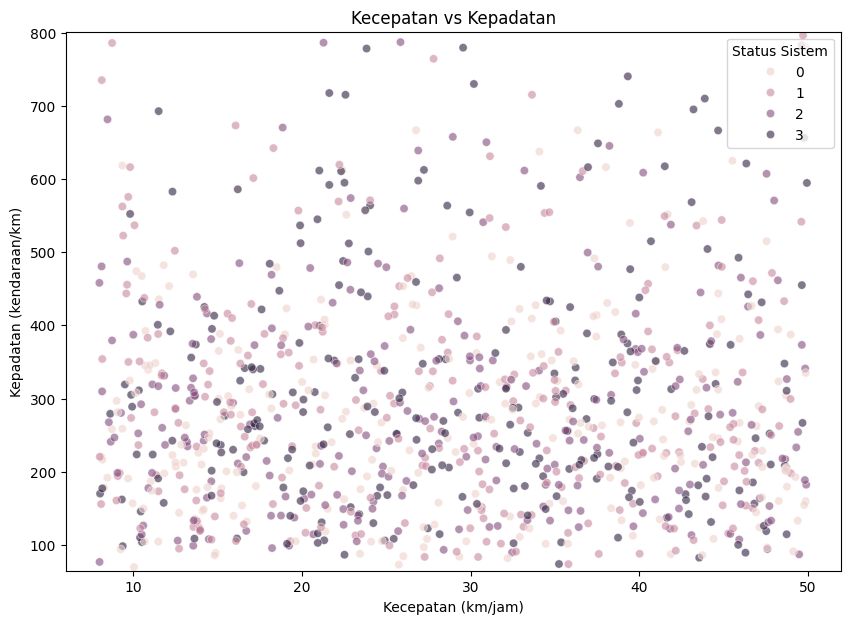

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_encoded,
    x="kecepatan_km_jam",
    y="kepadatan_kendaraan_per_km",
    hue="status_sistem",
    alpha=0.6
)

plt.xlim(df_encoded["kecepatan_km_jam"].min()-2, df_encoded["kecepatan_km_jam"].max()+2)
plt.ylim(df_encoded["kepadatan_kendaraan_per_km"].min()-5, df_encoded["kepadatan_kendaraan_per_km"].max()+5)

plt.title("Kecepatan vs Kepadatan")
plt.xlabel("Kecepatan (km/jam)")
plt.ylabel("Kepadatan (kendaraan/km)")
plt.legend(title="Status Sistem")
plt.show()


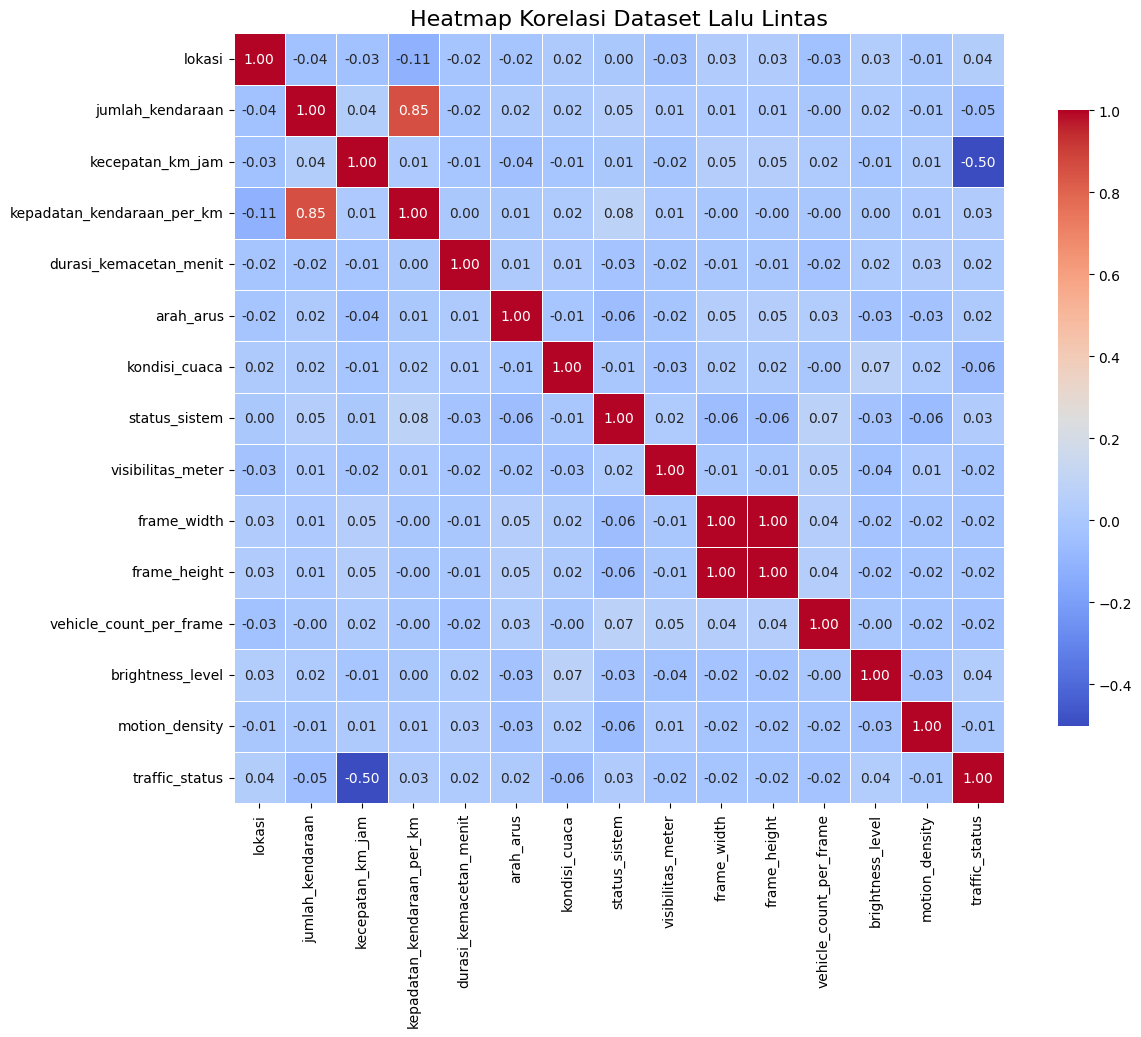

In [14]:
plt.figure(figsize=(14, 10))

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
if numeric_df.shape[1] == 0:
    raise ValueError("Tidak ada kolom numerik untuk menghitung korelasi.")

corr = numeric_df.corr()

sns.heatmap(
    data=corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap Korelasi Dataset Lalu Lintas", fontsize=16)
plt.show()


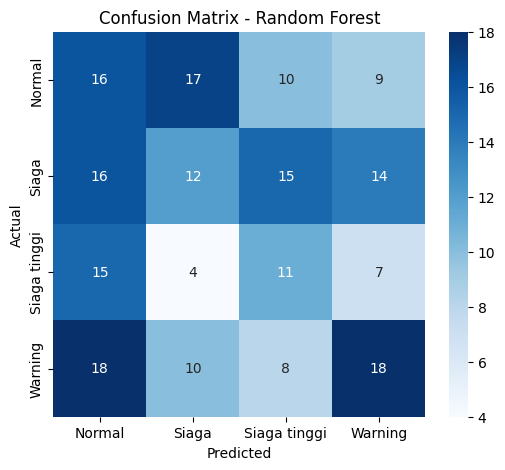

In [15]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoders["status_sistem"].classes_,
            yticklabels=encoders["status_sistem"].classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test, dt_pred)
acc_rf = accuracy_score(y_test, rf_pred)
acc_knn = accuracy_score(y_test, knn_pred)

print("Akurasi Decision Tree :", acc_dt)
print("Akurasi Random Forest :", acc_rf)
print("Akurasi KNN :", acc_knn)

best_model = max([("Decision Tree", acc_dt),
                  ("Random Forest", acc_rf),
                  ("KNN", acc_knn)], key=lambda x: x[1])
print("\nModel terbaik adalah:", best_model[0], "dengan akurasi", best_model[1])

Akurasi Decision Tree : 0.24
Akurasi Random Forest : 0.285
Akurasi KNN : 0.275

Model terbaik adalah: Random Forest dengan akurasi 0.285
